In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
np.random.seed(42)
n_siswa = 500

# 1. GENERATE DATA
data = {
    'StudentID': range(1001, 1001 + n_siswa),
    'Tanggal_Lahir': pd.date_range(start='2000-01-01', end='2004-12-31', periods=n_siswa),
    'Gender': np.random.choice(['L', 'P'], n_siswa),
    'IPK_Semester_Lalu': np.random.uniform(1.5, 4.0, n_siswa), # Nilai 1.5 s/d 4.0
    'Jumlah_Bolos': np.random.randint(0, 20, n_siswa), # Bolos 0 s/d 20 kali
    'Uang_Saku_Bulanan': np.random.randint(500000, 5000000, n_siswa) # 500rb - 5jt
}

df = pd.DataFrame(data)

# 2. KOTORI DATA (Missing Values)
# Ada mahasiswa yang IPK-nya kosong (mungkin cuti)
df.loc[10:20, 'IPK_Semester_Lalu'] = np.nan

print("Data Mentah (Perhatikan Kolom Tanggal_Lahir & Jumlah_Bolos):")
display(df.head())

/home/ahmad/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Data Mentah (Perhatikan Kolom Tanggal_Lahir & Jumlah_Bolos):


,StudentID,Tanggal_Lahir,Gender,IPK_Semester_Lalu,Jumlah_Bolos,Uang_Saku_Bulanan
0,1001,2000-01-01 00:00:00.000000000,L,2.236122,18,2069123
1,1002,2000-01-04 15:49:25.130260521,P,2.462744,5,3779269
2,1003,2000-01-08 07:38:50.260521042,L,3.627842,5,2226470
3,1004,2000-01-11 23:28:15.390781563,L,2.292305,2,3840420
4,1005,2000-01-15 15:17:40.521042084,L,1.923732,6,548874


In [2]:
df.isnull().sum()

StudentID             0
Tanggal_Lahir         0
Gender                0
IPK_Semester_Lalu    11
Jumlah_Bolos          0
Uang_Saku_Bulanan     0
dtype: int64

In [3]:
df['IPK_Semester_Lalu'] = df['IPK_Semester_Lalu'].fillna(df['IPK_Semester_Lalu'].median())


In [4]:
df

,StudentID,Tanggal_Lahir,Gender,IPK_Semester_Lalu,Jumlah_Bolos,Uang_Saku_Bulanan
0,1001,2000-01-01 00:00:00.000000000,L,2.236122,18,2069123
1,1002,2000-01-04 15:49:25.130260521,P,2.462744,5,3779269
2,1003,2000-01-08 07:38:50.260521042,L,3.627842,5,2226470
3,1004,2000-01-11 23:28:15.390781563,L,2.292305,2,3840420
4,1005,2000-01-15 15:17:40.521042084,L,1.923732,6,548874
...,...,...,...,...,...,...
495,1496,2004-12-16 08:42:19.478957920,L,3.748936,8,1280641
496,1497,2004-12-20 00:31:44.609218432,L,2.459728,12,4966134
497,1498,2004-12-23 16:21:09.739478976,P,2.858882,10,2054205
498,1499,2004-12-27 08:10:34.869739488,L,3.766180,12,2204597


In [5]:
df.isnull().sum()

StudentID            0
Tanggal_Lahir        0
Gender               0
IPK_Semester_Lalu    0
Jumlah_Bolos         0
Uang_Saku_Bulanan    0
dtype: int64

In [6]:
df = df.drop_duplicates()
df

,StudentID,Tanggal_Lahir,Gender,IPK_Semester_Lalu,Jumlah_Bolos,Uang_Saku_Bulanan
0,1001,2000-01-01 00:00:00.000000000,L,2.236122,18,2069123
1,1002,2000-01-04 15:49:25.130260521,P,2.462744,5,3779269
2,1003,2000-01-08 07:38:50.260521042,L,3.627842,5,2226470
3,1004,2000-01-11 23:28:15.390781563,L,2.292305,2,3840420
4,1005,2000-01-15 15:17:40.521042084,L,1.923732,6,548874
...,...,...,...,...,...,...
495,1496,2004-12-16 08:42:19.478957920,L,3.748936,8,1280641
496,1497,2004-12-20 00:31:44.609218432,L,2.459728,12,4966134
497,1498,2004-12-23 16:21:09.739478976,P,2.858882,10,2054205
498,1499,2004-12-27 08:10:34.869739488,L,3.766180,12,2204597


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df

,StudentID,Tanggal_Lahir,Gender,IPK_Semester_Lalu,Jumlah_Bolos,Uang_Saku_Bulanan
0,1001,2000-01-01 00:00:00.000000000,L,2.236122,18,2069123
1,1002,2000-01-04 15:49:25.130260521,P,2.462744,5,3779269
2,1003,2000-01-08 07:38:50.260521042,L,3.627842,5,2226470
3,1004,2000-01-11 23:28:15.390781563,L,2.292305,2,3840420
4,1005,2000-01-15 15:17:40.521042084,L,1.923732,6,548874
...,...,...,...,...,...,...
495,1496,2004-12-16 08:42:19.478957920,L,3.748936,8,1280641
496,1497,2004-12-20 00:31:44.609218432,L,2.459728,12,4966134
497,1498,2004-12-23 16:21:09.739478976,P,2.858882,10,2054205
498,1499,2004-12-27 08:10:34.869739488,L,3.766180,12,2204597


# Feature Enginering

In [9]:
#menambahkan kolom id age dengan mengurangi tahun sekarang dengan tanggal lahir 
df['Tahun_Lahir'] = df['Tanggal_Lahir'].dt.year
df['Age'] = 2026 - df['Tahun_Lahir']

#total kehadiran dalam persen
df['Kehadiran'] = ((16 - df['Jumlah_Bolos']) / 16) * 100

df = df.drop(['IPK_Semester_Lalu', 'Tanggal_Lahir', 'Jumlah_Bolos'], axis = 1)


In [10]:
df

,StudentID,Gender,Uang_Saku_Bulanan,Tahun_Lahir,Age,Kehadiran
0,1001,L,2069123,2000,26,-12.50
1,1002,P,3779269,2000,26,68.75
2,1003,L,2226470,2000,26,68.75
3,1004,L,3840420,2000,26,87.50
4,1005,L,548874,2000,26,62.50
...,...,...,...,...,...,...
495,1496,L,1280641,2004,22,50.00
496,1497,L,4966134,2004,22,25.00
497,1498,P,2054205,2004,22,37.50
498,1499,L,2204597,2004,22,25.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          500 non-null    int64  
 1   Gender             500 non-null    object 
 2   Uang_Saku_Bulanan  500 non-null    int64  
 3   Tahun_Lahir        500 non-null    int32  
 4   Age                500 non-null    int32  
 5   Kehadiran          500 non-null    float64
dtypes: float64(1), int32(2), int64(2), object(1)
memory usage: 19.7+ KB


In [12]:
df.describe()

,StudentID,Uang_Saku_Bulanan,Tahun_Lahir,Age,Kehadiran
count,500.000000,5.000000e+02,500.00000,500.00000,500.000000
mean,1250.500000,2.804243e+06,2001.99800,24.00200,41.400000
std,144.481833,1.314165e+06,1.41775,1.41775,35.990963
min,1001.000000,5.224310e+05,2000.00000,22.00000,-18.750000
25%,1125.750000,1.706562e+06,2001.00000,23.00000,12.500000
50%,1250.500000,2.877504e+06,2002.00000,24.00000,43.750000
75%,1375.250000,3.908404e+06,2003.00000,25.00000,75.000000
max,1500.000000,4.995511e+06,2004.00000,26.00000,100.000000


In [13]:
numeric = df.select_dtypes('number').columns
numeric

Index(['StudentID', 'Uang_Saku_Bulanan', 'Tahun_Lahir', 'Age', 'Kehadiran'], dtype='object')

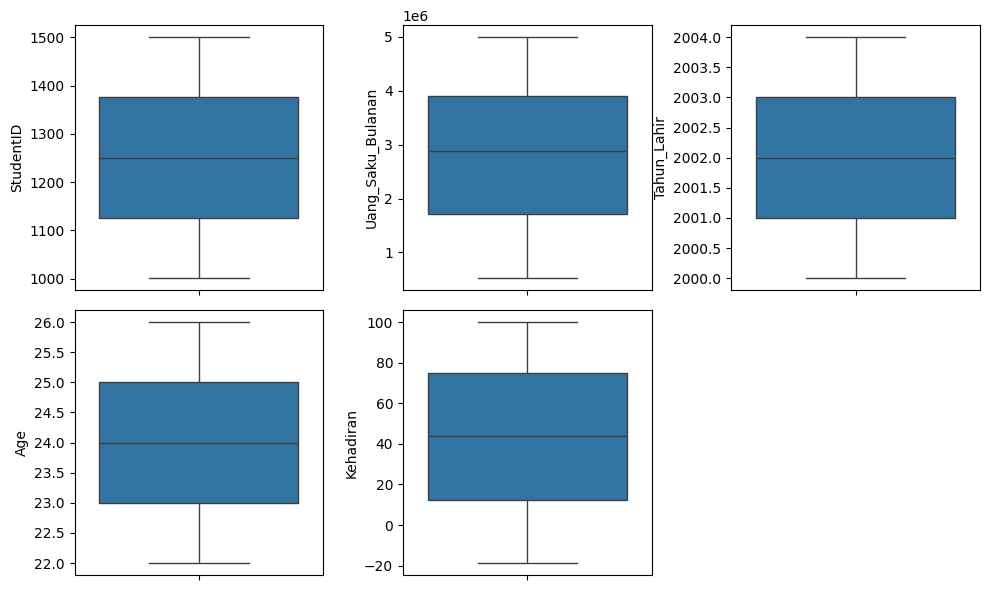

In [14]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df[column])
plt.tight_layout()
plt.show()

In [15]:
df = df[df['Kehadiran'] >= 0]
df = df[df['Uang_Saku_Bulanan'] >= 0]
df

,StudentID,Gender,Uang_Saku_Bulanan,Tahun_Lahir,Age,Kehadiran
1,1002,P,3779269,2000,26,68.75
2,1003,L,2226470,2000,26,68.75
3,1004,L,3840420,2000,26,87.50
4,1005,L,548874,2000,26,62.50
6,1007,L,3720281,2000,26,56.25
...,...,...,...,...,...,...
495,1496,L,1280641,2004,22,50.00
496,1497,L,4966134,2004,22,25.00
497,1498,P,2054205,2004,22,37.50
498,1499,L,2204597,2004,22,25.00


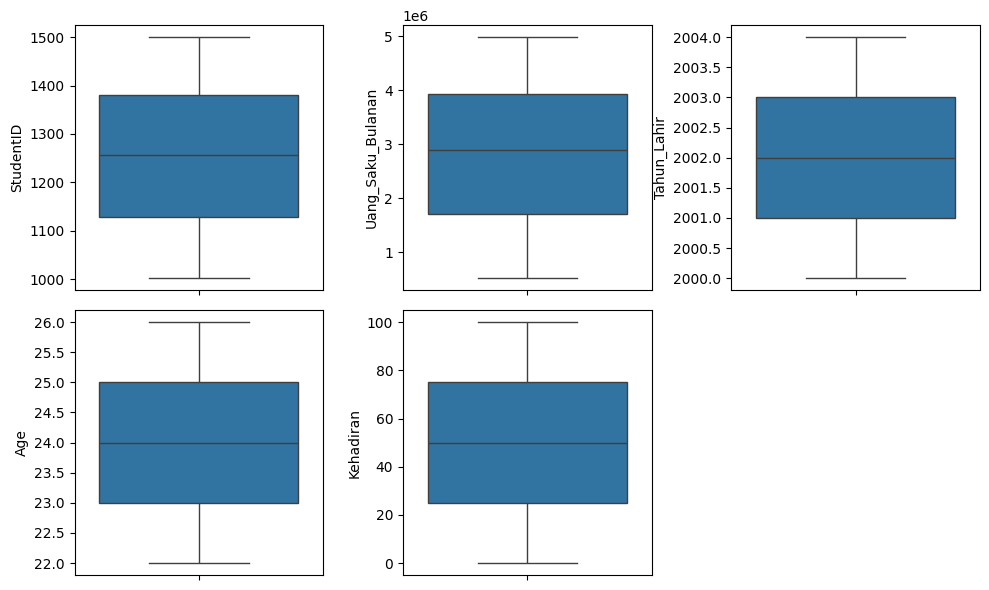

In [16]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df[column])
plt.tight_layout()
plt.show()

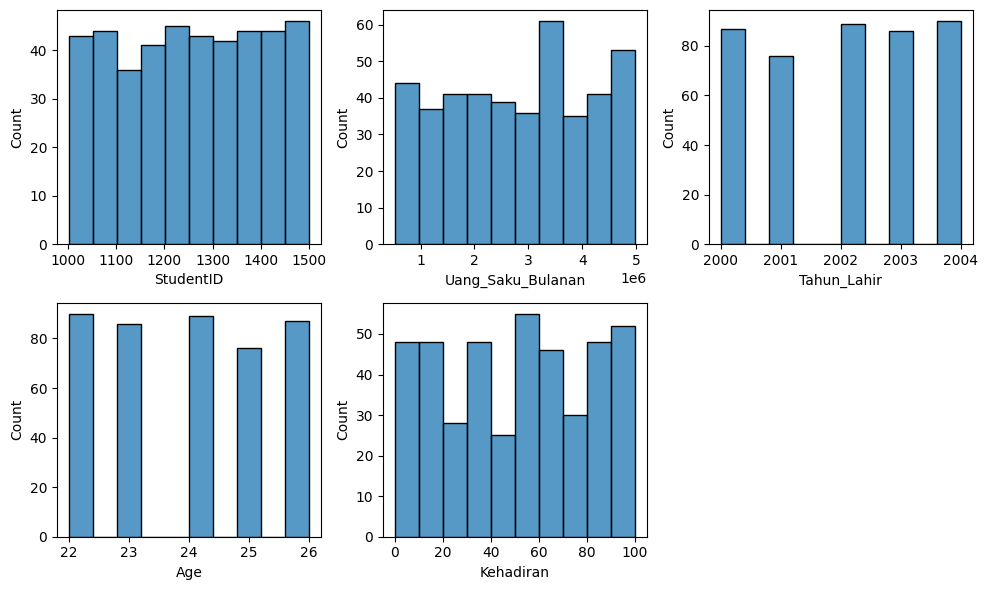

In [17]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column])
plt.tight_layout()
plt.show()

In [18]:
df.describe()

,StudentID,Uang_Saku_Bulanan,Tahun_Lahir,Age,Kehadiran
count,428.000000,4.280000e+02,428.000000,428.000000,428.000000
mean,1254.570093,2.815704e+06,2002.037383,23.962617,50.423481
std,145.236470,1.315552e+06,1.426909,1.426909,30.706687
min,1002.000000,5.224310e+05,2000.000000,22.000000,0.000000
25%,1128.750000,1.707016e+06,2001.000000,23.000000,25.000000
50%,1257.000000,2.891338e+06,2002.000000,24.000000,50.000000
75%,1380.250000,3.926236e+06,2003.000000,25.000000,75.000000
max,1500.000000,4.978011e+06,2004.000000,26.000000,100.000000
